In [1]:
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

In [2]:
def generador_regex(options,positions,mismatches):
    lista_listas = []
    lista_listas.append(options)
    if(positions):
        for k in range(len(positions)+1):
            for i in positions:
                options_ = lista_listas[k].copy()
                if options_[i] == '.':
                    continue
                else:
                    options_[i] = '.'
                    if options_ in lista_listas:
                        continue
                    else:
                        lista_listas.append(options_)
    lista_strings = []
    for lst in lista_listas:
        lista_strings.append(''.join(lst))
        
    lista_reverse_comp = []
    for patron in lista_strings:
        cadena = ''
        for char in patron:
            if char=='A':
                cadena = cadena+'T'
            elif char=='T':
                cadena = cadena+'A'
            elif char=='G':
                cadena = cadena+'C'
            elif char=='C':
                cadena = cadena+'G'
            elif char==')':
                cadena = cadena+'('
            elif char=='(':
                cadena = cadena+')'
            else:
                cadena = cadena+char
                
        cadena = cadena[::-1]
        lista_reverse_comp.append(cadena)
    for patron in lista_reverse_comp:
        lista_strings.append(patron)   
    return lista_strings

def make_template(entero):
    numbers = []
    for i in range(int(entero)):
        numbers.append(str(i))
    template = ''.join(numbers)
    return template

def parse_positions(posiciones):
    if(posiciones):
        lista = posiciones.split(',')
        numbers = list(map(int, lista))
        return numbers
    else:
        return
    

def base_pairs(entero):
    options = []
    print('(Las opciones van separadas por un pipe \'|\'.)')
    for i in range(int(entero)):
        options.append('('+input('Opciones para la posición %i: ' %i)+')')
    return options

def make_regex_list():
    string_length = input('Tamaño de la caja: ')
    mismatch_number = input('Numero permitido de mismatches: ')
    print(mismatch_number)
    print(make_template(string_length))
    if(mismatch_number==0):
        position_mismatches = ""
    else:
        position_mismatches = input('Posiciones para posible mismatch(separar con comas): ')
    options = base_pairs(string_length)
    regex = generador_regex(options,parse_positions(position_mismatches),mismatch_number)
    return regex

In [3]:
#Lee archivo con monomeros y crea y devuelve una lista de tuplas de la forma
#[...,(Nombre,Monomero),...]
def tuplificar(filename):
    temporary_file =open(filename,'r')
    titulos = []
    monomeros = []
    #Organiza los títulos y monómeros en tuplas
    for line in temporary_file:
        if line != '\n':
            if line.find('>') != -1:
                espacio = line.find(' ')
                line = line[1:espacio]
                titulos.append(line)
            else:
                line = line.rstrip('\n')
                monomeros.append(line)
            
    zipped = list(zip(titulos, monomeros))

    temporary_file.close()
    return zipped

In [4]:
lista_regex = make_regex_list()

Tamaño de la caja: 16
Numero permitido de mismatches: 2
2
0123456789101112131415
Posiciones para posible mismatch(separar con comas): 3,4,11,12
(Las opciones van separadas por un pipe '|'.)
Opciones para la posición 0: A|C|G|T
Opciones para la posición 1: A|C|G|T
Opciones para la posición 2: A|C|G|T
Opciones para la posición 3: G|A
Opciones para la posición 4: G|A
Opciones para la posición 5: C
Opciones para la posición 6: C
Opciones para la posición 7: A
Opciones para la posición 8: A
Opciones para la posición 9: T
Opciones para la posición 10: G|C
Opciones para la posición 11: G|A
Opciones para la posición 12: G
Opciones para la posición 13: A|C|G|T
Opciones para la posición 14: A|C|G|T
Opciones para la posición 15: A|C|G|T


In [5]:
lista_regex

['(A|C|G|T)(A|C|G|T)(A|C|G|T)(G|A)(G|A)(C)(C)(A)(A)(T)(G|C)(G|A)(G)(A|C|G|T)(A|C|G|T)(A|C|G|T)',
 '(A|C|G|T)(A|C|G|T)(A|C|G|T).(G|A)(C)(C)(A)(A)(T)(G|C)(G|A)(G)(A|C|G|T)(A|C|G|T)(A|C|G|T)',
 '(A|C|G|T)(A|C|G|T)(A|C|G|T)(G|A).(C)(C)(A)(A)(T)(G|C)(G|A)(G)(A|C|G|T)(A|C|G|T)(A|C|G|T)',
 '(A|C|G|T)(A|C|G|T)(A|C|G|T)(G|A)(G|A)(C)(C)(A)(A)(T)(G|C).(G)(A|C|G|T)(A|C|G|T)(A|C|G|T)',
 '(A|C|G|T)(A|C|G|T)(A|C|G|T)(G|A)(G|A)(C)(C)(A)(A)(T)(G|C)(G|A).(A|C|G|T)(A|C|G|T)(A|C|G|T)',
 '(A|C|G|T)(A|C|G|T)(A|C|G|T)..(C)(C)(A)(A)(T)(G|C)(G|A)(G)(A|C|G|T)(A|C|G|T)(A|C|G|T)',
 '(A|C|G|T)(A|C|G|T)(A|C|G|T).(G|A)(C)(C)(A)(A)(T)(G|C).(G)(A|C|G|T)(A|C|G|T)(A|C|G|T)',
 '(A|C|G|T)(A|C|G|T)(A|C|G|T).(G|A)(C)(C)(A)(A)(T)(G|C)(G|A).(A|C|G|T)(A|C|G|T)(A|C|G|T)',
 '(A|C|G|T)(A|C|G|T)(A|C|G|T)(G|A).(C)(C)(A)(A)(T)(G|C).(G)(A|C|G|T)(A|C|G|T)(A|C|G|T)',
 '(A|C|G|T)(A|C|G|T)(A|C|G|T)(G|A).(C)(C)(A)(A)(T)(G|C)(G|A).(A|C|G|T)(A|C|G|T)(A|C|G|T)',
 '(A|C|G|T)(A|C|G|T)(A|C|G|T)(G|A)(G|A)(C)(C)(A)(A)(T)(G|C)..(A|C|G|T)(A|C|G|T)(

In [6]:
#Compila la lista de expresiones regulares y las regrese como otra lista
def regex_compiler(lista_regex):
    import re
    lista_compilada = []
    #Compila las expresiones regulares en una lista
    for regex in lista_regex:
        lista_compilada.append(re.compile(regex))
    return lista_compilada

In [7]:
#Busca los patrones de caja en los monomeros y devuelve un dataframe con las cajas
#encontradas y sus posiciones
def analizar_monomeros(lista_tuplas,lista_regex_compilada):
    listas = [[],[],[],[],[],[],[]]
    lista_regex_b = []
    total = len(lista_regex_compilada)
    for i,regex in enumerate(lista_regex_compilada):
        if i<total/2:
            lista_regex_b.append([regex,0])
        else:
            lista_regex_b.append([regex,1])
    
    for pareja in zipped:
        resultados_busqueda = []
        for regex in lista_regex_b:
            s = 0
            while(True):
                coincidencia = [regex[0].search(pareja[1],s),regex[1]]
                resultados_busqueda.append(coincidencia)
                if(coincidencia[0]!=None):
                    s = coincidencia[0].span()[1]
                    print(s)
                else:
                    break
        indicesNone= []
        for i,resultado in enumerate(resultados_busqueda):
            if resultado[0] is None:
                indicesNone.append(i)
            else:
                continue
        
        for i in reversed(indicesNone):
            resultados_busqueda.pop(i)

        indicesRepetidos = []
        for i,resultado in enumerate(resultados_busqueda):
            for j, resultado_ in enumerate(resultados_busqueda):
                #print(i,j)
                if i < j and resultado[0].span() == resultado_[0].span():
                    if i not in indicesRepetidos:
                        indicesRepetidos.append(j)
                    else:
                        continue
                else:
                    continue

        for i in sorted(indicesRepetidos,reverse = True):
            resultados_busqueda.pop(i)
        
        lista_starts = []
        lista_coincidencias = []
        lista_booleana = []
               
        for resultado in resultados_busqueda:
            lista_coincidencias.append(pareja[1][resultado[0].span()[0]:resultado[0].span()[1]])
            lista_booleana.append(resultado[1])
            lista_starts.append(resultado[0].span()[0])
                                
        
        if lista_coincidencias != []:
                                
            listas[0].append(pareja[0])
            listas[1].append(len(lista_coincidencias))
            listas[2].append(len(pareja[1]))
            listas[3].append(lista_starts)
            listas[4].append(pareja[1])
            listas[5].append(lista_coincidencias)
            listas[6].append(lista_booleana)
        
                                
    data = {'clone_id':listas[0],'cantidad_de_cajas':listas[1],'tamaño':listas[2],'starts':listas[3],'coincidencias':listas[5],'booleano':listas[6]}
    data_h = {'Nombres':listas[0],'Monomero':listas[4],'Coincidencias':listas[5],'Booleano':listas[6]}
    data_db = {'Nombres':listas[0],'Monomero':listas[4]}
    
    data_monomeros = pd.DataFrame.from_dict(data)
    
    df_h = pd.DataFrame.from_dict(data_h)
    df_db = pd.DataFrame.from_dict(data_db)

    try:
        df_h = df_h.Coincidencias.apply(pd.Series).merge(df_h, left_index = True, right_index = True).drop(['Coincidencias'],axis =1)
        df_h = df_h.Booleano.apply(pd.Series).merge(df_h, left_index = True, right_index = True).drop(['Booleano'],axis =1)
    except Exception as e:
        raise e
    df_h.to_csv('data_h.csv')
    df_db.to_csv('data_db.csv')
                                

            
    return data_monomeros

In [8]:
#Modifica el archivo de input para ser procesado
def prepare_data(filename):
    input_file = open(filename,'r')
    temporary_file = open('temporary_file.txt','w')

    for line in input_file:
        if line.find('>') != -1:
            temporary_file.write('\n')
            temporary_file.write(line)
        else:
            line = line.strip('\n')
            line = line.upper()
            temporary_file.write(line)
        
    input_file.close()
    temporary_file.close()

    zipped = tuplificar('temporary_file.txt')
    
    numero_monomeros_input = len(zipped)

    return [zipped,numero_monomeros_input]

In [9]:
def graficar_datos(data):    
    #Grafica boxplot
    bplot = sns.boxplot(y='tamaño', x='cantidad_de_cajas',
                        data=data, 
                        width=0.5,
                        palette="colorblind")
 
    #Agrega swarmplot al boxplot
    bplot = sns.swarmplot(y='tamaño', x='cantidad_de_cajas',
                          data=data, 
                          color='black',
                          alpha=0.75)
    
    return

Monómeros analizados: 7
18143
18143
18143
18143
16278
18143
18143
18143
3537
16278
16473
17482
18143
18143
7182
7525
16278
18143
16278
18143
311
2101
2101
2101
2101
3071
7334
11089
11947
12118
3071
7334
11089
11947
12118
3071
7334
11089
11947
12118
3071
7334
11089
11947
12118
1126
1126
1126
1126
38437
38437
38437
38437
38437
38437
38437
38437
38437
38437
38437
481
2545
481
2202
2545
3549
481
2545
481
2545
6852
6852
5858
6852
6852
4552
5822
6682
6852
7194
131
5858
6852
6852
4552
5822
6682
6852
7194
7222
5858
6852
3506
4380
4552
5822
5858
6682
6852
7194
4552
5822
6682
6852
7194
1223
3081
3422
3765
4107
5477
3081
3422
3765
4107
5477
3081
3422
3765
4107
5477
3081
3422
3765
4107
5137
5477
6314
22763
22763
22763
22763
28587
24212
23840
19683
24212
33411
24212
24212
Monómeros positivos: 7
Porcentaje de monomeros positivos: 100.00%


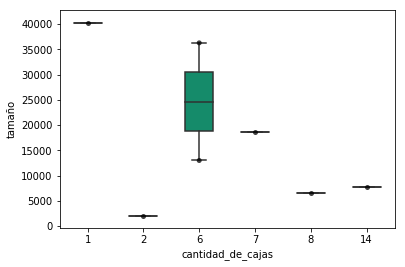

In [10]:
zipped = prepare_data('example_file.txt')[0]

monomeros_analizados = prepare_data('example_file.txt')[1]

print('Monómeros analizados: ' + str(monomeros_analizados))

lista_compilada = regex_compiler(lista_regex)

df = analizar_monomeros(zipped,lista_compilada)

graficar_datos(df)

df = df.starts.apply(pd.Series).merge(df, left_index = True, right_index = True).drop(['starts'], axis=1)
df = df.coincidencias.apply(pd.Series).merge(df, left_index = True, right_index = True).drop(['coincidencias'], axis=1)
df = df.booleano.apply(pd.Series).merge(df, left_index = True, right_index = True).drop(['booleano'], axis=1)

numero_monomeros_positivos = len(df.index)

df.to_csv('dataframe.csv')

print('Monómeros positivos: ' + str(numero_monomeros_positivos))

porcentaje = (numero_monomeros_positivos/monomeros_analizados)*100

print('Porcentaje de monomeros positivos: ' + str("%.2f" % porcentaje) + '%')


In [11]:
def createReport(monomeros_analizados, monomeros_positivos, porcentaje):
    from reportlab.lib.pagesizes import letter
    from reportlab.pdfgen import canvas
     
    canvas = canvas.Canvas("report.pdf", pagesize=letter)
    canvas.setLineWidth(.3)
    canvas.setFont('Helvetica', 20)
     
    canvas.drawString(220,750,'Análisis de Monómeros')

    canvas.setFont('Helvetica', 14)

    canvas.line(30,710,580,710)

    canvas.drawString(30,690,'Monómeros analizados: ' + str(monomeros_analizados) +'')
    canvas.drawString(30,670,'Monómeros positivos: ' + str(monomeros_positivos) + '')
    canvas.drawString(30,650,'Porcentaje positivo: ' + str("%.2f" % porcentaje) + '%')

    canvas.line(30,630,580,630)

    canvas.drawImage('boxplot.png',120,300,width=400,height=300)
     

    canvas.save()

    return

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,7_y,8_y,9_y,10_y,11_y,12_y,13_y,clone_id,cantidad_de_cajas,tamaño
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC124008.4,7,18551
1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC019063.4,2,2111
2,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL512605.13,6,13001
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BX537339.3,1,40248
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5806.0,6666.0,7178.0,115.0,7206.0,3490.0,4364.0,AC245148.2,14,7733
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,6298.0,NaN,NaN,NaN,NaN,NaN,NaN,LO000005.2,8,6555
6,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AC125386.1,6,36274
